In [10]:
#Imports

import MDAnalysis as mda
from MDAnalysis.analysis import contacts
from MDAnalysis.analysis import distances
import statistics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from pathlib import Path

In [11]:
#Function to find contacts

compounds_AB = ["DMNFH", "DMNFQ", "HAQOH", "HAQO", "MNDOL", "MND", "UBQH", "UBQ0", "XQH2", "XQ"]
replicates = ["rep_1", "rep_2", "rep_3", "rep_4", "rep_5"]

def contacts_within_cutoff(u, group_a, group_b, radius=6.0):
    timeseries = []
    for ts in tqdm(u.trajectory):
        # calculate distances between group_a and group_b
        dist = contacts.distance_array(group_a.positions, group_b.positions)
        # determine which distances <= radius
        n_contacts = contacts.contact_matrix(dist, radius)
        n_contacts_sum = n_contacts.sum()
        # ts.frame*utrajectory.dt = tempo de cada step 
        timeseries.append([ts.frame, n_contacts_sum])
    return np.array(timeseries), np.array(n_contacts)

In [12]:
#Entering into each folder to create the Universe and normalise the number of contacts - 1 per frame maximum

frames = {}
contactstotal = {}
contact_normalised = {}
contact_average_compound = {}
standard_deviation_compound = {}

#base_path = Path(".")
for compound in compounds_AB:
    reps = {}
    cts = {}
    normalisation = {}
    print(compound)
    for replicate in replicates:
        compoundpath = Path(f"{compound}/{replicate}")    
        if not compoundpath.is_dir():
            continue
        print(replicate)
        u = mda.Universe(str(compoundpath/"equilibration.gro"), str(compoundpath/"traj_comp.xtc"))
        ISOALO = u.select_atoms("resname FAD and name B14 B15 B16 B17 B18 B19 B20 B21 B22")
        test = u.select_atoms(f"resname {compound}")
        reps[replicate] = len(u.trajectory)
        function = contacts_within_cutoff(u, ISOALO, test)
        cts[replicate] = np.count_nonzero(function[0][:,1])
        normalisation[replicate] = (cts[replicate]/reps[replicate])*100

        
    frames[compound] = reps  #len(u.trajectory) = número de frames
    contactstotal[compound] = cts
    contact_normalised[compound] = normalisation
        
    contact_average_compound[compound] = statistics.mean([x for x in normalisation.values()])
    standard_deviation_compound[compound] = statistics.stdev([x for x in normalisation.values()])   

DMNFH
rep_1


100%|██████████| 70806/70806 [04:31<00:00, 260.68it/s]


rep_2


100%|██████████| 70764/70764 [04:42<00:00, 250.89it/s]


rep_3


100%|██████████| 70970/70970 [04:48<00:00, 246.14it/s]


rep_4


100%|██████████| 70845/70845 [04:30<00:00, 261.84it/s]


rep_5


100%|██████████| 70863/70863 [04:30<00:00, 261.98it/s]


DMNFQ
rep_1


100%|██████████| 64582/64582 [04:14<00:00, 254.23it/s]


rep_2


100%|██████████| 70536/70536 [04:49<00:00, 243.62it/s]


rep_3


100%|██████████| 64900/64900 [04:20<00:00, 248.99it/s]


rep_4


100%|██████████| 70021/70021 [04:56<00:00, 236.17it/s]


rep_5


100%|██████████| 70797/70797 [05:15<00:00, 224.08it/s]


HAQOH
rep_1


100%|██████████| 71265/71265 [04:40<00:00, 254.33it/s]


rep_2


100%|██████████| 57618/57618 [03:37<00:00, 265.33it/s]


rep_3


100%|██████████| 70472/70472 [04:40<00:00, 251.46it/s]


rep_4


100%|██████████| 70384/70384 [04:39<00:00, 251.38it/s]


rep_5


100%|██████████| 62270/62270 [04:03<00:00, 255.79it/s]


HAQO
rep_1


100%|██████████| 70524/70524 [04:19<00:00, 272.05it/s]


rep_2


100%|██████████| 70776/70776 [04:25<00:00, 266.36it/s]


rep_3


100%|██████████| 58799/58799 [03:45<00:00, 260.46it/s]


rep_4


100%|██████████| 70726/70726 [04:32<00:00, 259.18it/s]


rep_5


100%|██████████| 70733/70733 [04:22<00:00, 269.10it/s]


MNDOL
rep_1


100%|██████████| 68655/68655 [03:54<00:00, 292.72it/s]


rep_2


100%|██████████| 66836/66836 [04:38<00:00, 240.39it/s]


rep_3


100%|██████████| 70326/70326 [04:55<00:00, 238.39it/s]


rep_4


100%|██████████| 70740/70740 [04:59<00:00, 236.55it/s]


rep_5


100%|██████████| 70179/70179 [04:45<00:00, 246.04it/s]


MND
rep_1


100%|██████████| 205728/205728 [12:45<00:00, 268.59it/s]


rep_2


100%|██████████| 211308/211308 [13:13<00:00, 266.14it/s]


rep_3


100%|██████████| 202537/202537 [12:51<00:00, 262.66it/s]


rep_4


100%|██████████| 201348/201348 [12:48<00:00, 262.17it/s]


rep_5


100%|██████████| 198911/198911 [12:39<00:00, 261.90it/s]


UBQH
rep_1


100%|██████████| 71020/71020 [04:29<00:00, 263.46it/s]


rep_2


100%|██████████| 59002/59002 [03:52<00:00, 253.79it/s]


rep_3


100%|██████████| 58568/58568 [04:04<00:00, 239.15it/s]


rep_4


100%|██████████| 70838/70838 [04:39<00:00, 253.01it/s]


rep_5


100%|██████████| 60279/60279 [03:57<00:00, 253.41it/s]


UBQ0
rep_1


100%|██████████| 70848/70848 [04:40<00:00, 252.17it/s]


rep_2


100%|██████████| 70535/70535 [04:30<00:00, 261.13it/s]


rep_3


100%|██████████| 66715/66715 [04:29<00:00, 247.20it/s]


rep_4


100%|██████████| 68833/68833 [04:18<00:00, 266.51it/s]


rep_5


100%|██████████| 67004/67004 [04:06<00:00, 271.81it/s]


XQH2
rep_1


100%|██████████| 70105/70105 [04:34<00:00, 255.22it/s]


rep_2


100%|██████████| 59514/59514 [03:55<00:00, 252.45it/s]


rep_3


100%|██████████| 68903/68903 [04:32<00:00, 252.57it/s]


rep_4


100%|██████████| 71548/71548 [04:51<00:00, 245.17it/s]


rep_5


100%|██████████| 69988/69988 [04:27<00:00, 262.00it/s]


XQ
rep_1


100%|██████████| 199983/199983 [12:01<00:00, 277.34it/s]


rep_2


100%|██████████| 199932/199932 [12:40<00:00, 263.04it/s]


rep_3


100%|██████████| 141240/141240 [08:11<00:00, 287.57it/s]


rep_4


100%|██████████| 208343/208343 [12:58<00:00, 267.69it/s]


rep_5


100%|██████████| 202449/202449 [12:45<00:00, 264.36it/s]


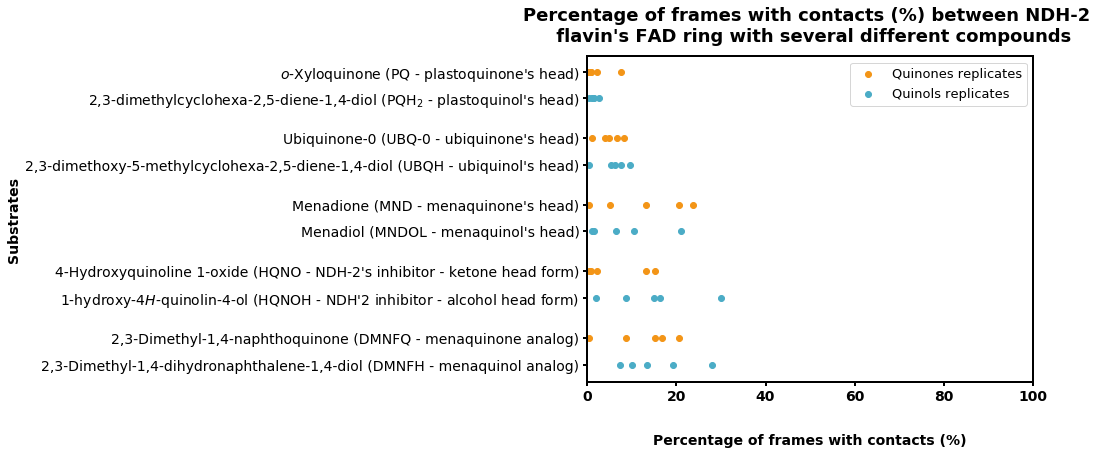

In [18]:
#Create the plot

replicate_values = []
for values in contact_normalised.values():
    replicate_values.append(values)

colors = ["#4bacc6", "#f39517"]

old_colors = [[C]*5 for C in colors]*5
colors_new = []
for i in old_colors:
     colors_new.extend(i)

compounds = ["2,3-Dimethyl-1,4-dihydronaphthalene-1,4-diol (DMNFH - menaquinol analog)",
             "2,3-Dimethyl-1,4-naphthoquinone (DMNFQ - menaquinone analog)", 
             "1-hydroxy-$4H$-quinolin-4-ol (HQNOH - NDH'2 inhibitor - alcohol head form)", 
             "4-Hydroxyquinoline 1-oxide (HQNO - NDH-2's inhibitor - ketone head form)", 
             "Menadiol (MNDOL - menaquinol's head)", 
             "Menadione (MND - menaquinone's head)", 
             "2,3-dimethoxy-5-methylcyclohexa-2,5-diene-1,4-diol (UBQH - ubiquinol's head)", 
             "Ubiquinone-0 (UBQ-0 - ubiquinone's head)", 
             "2,3-dimethylcyclohexa-2,5-diene-1,4-diol (PQH$_2$ - plastoquinol's head)", 
             "$o$-Xyloquinone (PQ - plastoquinone's head)"]

compoundsQH2 = compounds[::2]
compoundsQ = compounds[1::2]
replicate_values_QH2 = replicate_values[::2]
replicate_values_Q = replicate_values[1::2]

yQH2 = []
yQ = []
ys = []
colorQ = "#f39517"
colorQH2 = "#4bacc6"
labels = ["Quinols replicates","Quinones replicates"]

for pos in range(len(compoundsQH2)):
    yQ.append(pos+0.2)
    yQH2.append(pos-0.2)
    ys.extend((yQH2[-1], yQ[-1]))
    
fig, ax = plt.subplots(figsize=(8,6))

x=replicate_values

old_y = [[C]*5 for C in ys]
y = []
for i in old_y:
    y.extend(i)
    
old_yQ = [[C]*5 for C in yQ]
yQ_new = []
for i in old_yQ:
    yQ_new.extend(i)

old_yQH2 = [[C]*5 for C in yQH2]
yQH2_new = []
for i in old_yQH2:
    yQH2_new.extend(i)

x_to_plot = [item for sub_dict in contact_normalised.values() for item in sub_dict.values()]
x_even = [item for ix, sub_dict in enumerate(contact_normalised.values()) for item in sub_dict.values() if ix%2==0]
x_odd = [item for ix, sub_dict in enumerate(contact_normalised.values()) for item in sub_dict.values() if ix%2!=0]

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(width=2, length=4)

line1 = ax.scatter(x=x_even, y=yQ_new, color=colorQ, label="Quinones replicates")
line2 = ax.scatter(x=x_odd, y=yQH2_new, color=colorQH2, label="Quinols replicates")
ax.set_yticks(ys)
ax.set_yticklabels(compounds, fontsize=14)
ax.set_xticklabels(np.arange(0,120, 20), fontsize=14, fontweight="bold")
ax.set_ylabel('Substrates', fontsize=14, fontweight = "bold")
ax.set_xlabel("Percentage of frames with contacts (%)", fontsize=14, fontweight = "bold", labelpad=30)
ax.set_title("Percentage of frames with contacts (%) between NDH-2 \n flavin's FAD ring with several different compounds", fontsize=18, verticalalignment='center', fontweight = "bold", pad = "30.0")
ax.legend(handles=[line1, line2], loc="upper right", fontsize=13)
ax.set_xlim((0, 100))

plt.savefig("FAD_FLAVIN_contacts.svg", orientation="landscape", quality=95, dpi = 100, bbox_inches="tight")
plt.show()